sales = b0 + b1*cost 
y = b0 + b1*x1

what is b1: 
si b1 = 0;  cost doesn't have any impact on sales

what is b0 : 
when b1 = 0 ( cost doesn't have any impact on sales) b0 is the sales. 

sales  = b0 + b1*cost + b2*time + b3*quality


what is the sales, 
when cost is 10, time is 5, quality is 2, 
sales??  
b0, b1, b2, b3. incognitas (unknowns) 

after the calculation, b1=1, b2 =0, b3 = 0, b0 = 1200

what is b1= 1? 
when cost increase 1 unit, sales also increase b1 times



In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('/content/reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [103]:
#pip install sklearn

In [104]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.580216,-0.207958
Age,0.580216,1.000000,-0.321182
Weight,-0.207958,-0.321182,1.000000


Simple regression :  (when there is only one independent variable)

### `Age` has  any impact on `Salary` ???

Salary = b0 + b1*Age

y = b0 + b1*x

Dependent variable: Salary

Indepent variable : Age

b0 : constant (intercept)

b1 : coefficient of Age

In [105]:
df.dropna(inplace = True)
#df

In [106]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm = linear_model.LinearRegression()

model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [107]:
#df

In [108]:
print('The intercept (b0) is  \t\t\t :', model_lm.intercept_)
print('The coefficients (b1, b2, b3, ... ) are  :', model_lm.coef_)
print('Model score (R-square) value is   \t :', model_lm.score(x,y))

The intercept (b0) is  			 : [349.44580104]
The coefficients (b1, b2, b3, ... ) are  : [[48.09321584]]
Model score (R-square) value is   	 : 0.380484541757693


Salary = b0 + b1*Age

Salary = 349.44580104 + 48.09321584*Age

$$R^2 = 0.38 = 38.04\%$$

that means, 38.04% of the `Salary` depends on `Age`

In [109]:
modelA = sm.OLS.from_formula('Salary ~ Age', 
                             data = df
)

In [110]:
resultA = modelA.fit()
resultA.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0326
Time:                        01:34:23   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
df.shape

(12, 7)

In [112]:
predicted_values = resultA.fittedvalues.to_frame()
residuales = resultA.resid
study  = [df['Salary'], df['Age'], predicted_values, residuales ] 
study

[0     1500.0
 1     1200.0
 2     2200.0
 3     2100.0
 4     1500.0
 5     1700.0
 6     3000.0
 7     3000.0
 8     2800.0
 9     2900.0
 10    2780.0
 11    2550.0
 Name: Salary, dtype: float64, 0     33.0
 1     33.0
 2     34.0
 3     42.0
 4     29.0
 5     42.0
 6     50.0
 7     55.0
 8     31.0
 9     46.0
 10    36.0
 11    48.0
 Name: Age, dtype: float64,               0
 0   1936.521924
 1   1936.521924
 2   1984.615140
 3   2369.360866
 4   1744.149060
 5   2369.360866
 6   2754.106593
 7   2994.572672
 8   1840.335492
 9   2561.733730
 10  2080.801571
 11  2657.920161, 0    -436.521924
 1    -736.521924
 2     215.384860
 3    -269.360866
 4    -244.149060
 5    -669.360866
 6     245.893407
 7       5.427328
 8     959.664508
 9     338.266270
 10    699.198429
 11   -107.920161
 dtype: float64]

In [113]:
study_table = pd.concat(study, axis = 1)
study_table.columns = ['Salary', 'Age', 'PretValues', 'RESI_age']
study_table['difference'] = study_table['Salary'] - study_table['PretValues']
study_table

,Salary,Age,PretValues,RESI_age,difference
0,1500.0,33.0,1936.521924,-436.521924,-436.521924
1,1200.0,33.0,1936.521924,-736.521924,-736.521924
2,2200.0,34.0,1984.615140,215.384860,215.384860
3,2100.0,42.0,2369.360866,-269.360866,-269.360866
4,1500.0,29.0,1744.149060,-244.149060,-244.149060
5,1700.0,42.0,2369.360866,-669.360866,-669.360866
6,3000.0,50.0,2754.106593,245.893407,245.893407
7,3000.0,55.0,2994.572672,5.427328,5.427328
8,2800.0,31.0,1840.335492,959.664508,959.664508
9,2900.0,46.0,2561.733730,338.266270,338.266270


what is the salary of a person with age 33? 



Salary = 349.44580104 + 48.09321584*Age



In [114]:
print('Salary of a person with age 33 is \t: ', 349.44580104 + 48.09321584*33)
study_table.iloc[:1, :]

Salary of a person with age 33 is 	:  1936.52192376


,Salary,Age,PretValues,RESI_age,difference
0,1500.0,33.0,1936.521924,-436.521924,-436.521924


In [115]:
z = ([0, 15, 33, 34, 35])
a = pd.DataFrame(z) 
b = model_lm.predict(a)
b = pd.DataFrame(b) 
ndf = pd.concat([a,b], 
                axis = 1, 
                keys  = ['New_age', 'Predicted_salary']
)
ndf

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,New_age,Predicted_salary
,0,0
0,0,349.445801
1,15,1070.844039
2,33,1936.521924
3,34,1984.615140
4,35,2032.708355


El modelo que tenemos, es confiable???

Analisis de los residuales 

Para confiar, nuestro modelo, los RESIDUAleS tienen que serguir 3 supuestos: 
1. Los RESI tienen una distribucion NORMAL
2. Los RESI tienen una varianza constante
3. Los RESI aleatorios y son independientes. Podemos hacer este estudio, atraves del Estadistica del Durbin Watson. Este es un valor definido entre (0, 4). Si el valor DW es alrededor de 2, si este residuos son aleatorios y son independientes. si no, no!!! 

In [116]:
ResiA = resultA.resid
ResiA

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

In [117]:
fi_values = resultA.fittedvalues
fi_values

0     1936.521924
1     1936.521924
2     1984.615140
3     2369.360866
4     1744.149060
5     2369.360866
6     2754.106593
7     2994.572672
8     1840.335492
9     2561.733730
10    2080.801571
11    2657.920161
dtype: float64

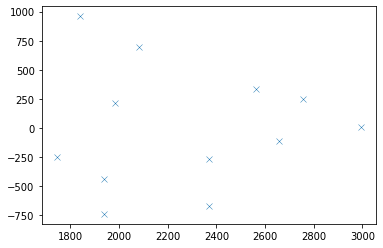

In [118]:
resi_plot = sns.scatterplot(x = fi_values, 
                            y = ResiA, 
                            marker = 'x',
)
plt.show()

Is salary is depend on Age and Gender

Salary = b0 + b1*Age + b2*Gender

Salary = b0 + b1*Age + b2*(Female + Male) 

What is the salary of a `Female` person with age `33`

In [119]:
modelAG = sm.OLS.from_formula('Salary ~ Age + Gender', 
                             data = df
)
resultAG = modelAG.fit()
resultAG.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0945
Time:                        01:34:23   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Salary = b0 + b1*Age + b2*Gender

Salary = b0 + b1*Age + b2*(Female + Male) 

Salary = 749.8157	 + 34.2211*Age + 306.7169*Male


In [120]:

print('Salary of a Female person with age 33 is \t: ', 749.8157	 + 34.2211*33 + 306.7169*0)

print('Salary of a Male person with age 33 is \t\t: ', 749.8157	 + 34.2211*33 + 306.7169*1)

Salary of a Female person with age 33 is 	:  1879.112
Salary of a Male person with age 33 is 		:  2185.8289


In [121]:
residAG  = resultAG.resid.to_frame()
predValAG =resultAG.fittedvalues.to_frame()
study = [df['Salary'], df['Age'], df['Gender'], residAG, predValAG]
study = pd.concat(study,
                  axis = 1
)
study.columns = ['Salary', 'Age', 'Gender', 'RESI', 'PredictVal']
study 

,Salary,Age,Gender,RESI,PredictVal
0,1500.0,33.0,Female,-379.112228,1879.112228
1,1200.0,33.0,Female,-679.112228,1879.112228
2,2200.0,34.0,Male,-20.050251,2220.050251
3,2100.0,42.0,Male,-393.819095,2493.819095
4,1500.0,29.0,Female,-242.227806,1742.227806
5,1700.0,42.0,Female,-487.102178,2187.102178
6,3000.0,50.0,Male,232.412060,2767.587940
7,3000.0,55.0,Male,61.306533,2938.693467
8,2800.0,31.0,Female,989.329983,1810.670017
9,2900.0,46.0,Male,269.296482,2630.703518


In [122]:
z = ([0, 15, 33, 34, 35])
a = pd.DataFrame(z) 
b = model_lm.predict(a)
b = pd.DataFrame(b) 
ndf = pd.concat([a,b], 
                axis = 1, 
                keys  = ['New_age', 'Predicted_salary']
)
ndf

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,New_age,Predicted_salary
,0,0
0,0,349.445801
1,15,1070.844039
2,33,1936.521924
3,34,1984.615140
4,35,2032.708355


In [123]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [130]:
modelAGD = sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree ', 
                             data = df
)
resultAGD = modelAGD.fit()
resultAGD.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.267
Time:                        01:43:35   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Salary = b0 + b1*Age + b2*Gender + b3*Academic_degree

Salary = b0 + b1*Age + b2*(Male + Female) + b3*(Bachelor + No + Master)

Salary = b0        + b1*Age      + b2(Male) + b3*(Master + No )

Salary = 	815.5485 + 36.3765*Age + 336.1028*Male -373.1962*Master -43.8495*No 

What is the salary of a `Female` with age `33`, with `Bachelor` degree

In [128]:
print('salary of a Female with age 33, with Bachelor degree is : \t', 
      815.5485 + 36.3765*33 + 336.1028*0 -373.1962*0 -43.8495*0)

salary of a Female with age 33, with Bachelor degree is : 	 2015.973


In [131]:
print('salary of a Male with age 33, with Master degree is : \t', 
      815.5485 + 36.3765*33 + 336.1028*1 -373.1962*1 -43.8495*0)

salary of a Male with age 33, with Master degree is : 	 1978.8796000000002
